欢迎来到线性回归项目。

若项目中的题目有困难没完成也没关系，我们鼓励您带着问题提交项目，评审会给予您诸多帮助。

其中证明题可以提交 pdf 格式，手写后扫描或使用公式编辑器（latex，mathtype）均可行。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [6]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何python库，包括NumPy，来完成作业

A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [7]:
# TODO 返回矩阵的行数和列数
def shape(M):
    """
    Calcuate the count of row and column in the matrix
    @param M: the matrix
    @return: (n, m) 'n' represents the count of row; 
            'm' represents the count of column
    """
    return len(M), len(M[0])

In [8]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [9]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    """
    Set the precision of each value in the matrix
    @Param M: the matrix
    @Param decPts: The precision of the value
    """
    #Foreach the row of matrix
    if decPts < 0:
        return
    for i in range(len(M)):
        #Foreach the column of every matrix column
        for j in range(len(M[i])):
            M[i][j] = round(M[i][j], decPts)

In [10]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.042s

OK


## 1.4 计算矩阵的转置

In [11]:
# TODO 计算矩阵的转置
def transpose(M):
    """
    Calculate the transpose of the matrix.
    @Param M: the matrix
    @return: the transponse of the matrix.
    """
    return [list(col) for col in zip(*M)]

In [12]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.075s

OK


## 1.5 计算矩阵乘法 AB

In [13]:
# TODO 计算矩阵乘法 AB，如果无法相乘则返回None
def matxMultiply(A, B):
    """
    Calculate the product of A and B.
    When the column count of A is not equal the row count of B, the
    product is None.
    When the A or B is equal None, the product is None.
    
    @param A: the first matrix
    @param B: the second matrix
    @return: the product.
    """
    # Verify the A and B.
    shape_A = shape(A)
    shape_B = shape(B)
    
    # Verify the column count of A and the row count of B
    if shape_A[1] != shape_B[0]:
        return 'The dimension don\'t match'
    
    BT = transpose(B)
    return [ [sum(a*b for a, b in zip(row, col) ) for col in BT] for row in A]

In [14]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.181s

OK


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [15]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
        
    return [ ra + rb for ra, rb in zip(A, b)]

In [16]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [17]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    if r1 == r2:
        return
    if len(M) < r1 or len(M) < r2:
        raise Exception("r1 or r2 is too bigger")
    M[r1], M[r2] = M[r2], M[r1]

In [18]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [19]:
# TODO r1 <--- r1 * scale， scale!=0
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError
    for index in range(len(M[r])):
        M[r][index] *= scale

In [20]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [21]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    if len(M) < r1 or len(M) < r2:
        return 'r1 or r2 is too bigger'
    # Calculate r2 * scale
    a = []
    M[r1] = [a+b*scale for a, b in zip(M[r1], M[r2])]

In [22]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 提示：

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None （请在问题2.4中证明该命题）
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

### 注：
我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

In [23]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""

def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    if len(A) != len(b):
        return ValueError

    # Generate augmented matrix
    Ab = augmentMatrix(A, b)

    shapes = shape(Ab)
    rowCount = shapes[0]
    columnCount = shapes[1] - 1

    for columnIndex in range(columnCount):
        diagonalIndex = columnIndex
        if rowCount < columnIndex:
            diagonalIndex = rowCount

        maxValue = 0
        label = diagonalIndex
        for rowIndex in range(diagonalIndex, rowCount):
            value = abs(Ab[rowIndex][columnIndex])
            if value > maxValue:
                maxValue = value
                label = rowIndex

        # The float in python is not presize. There may be a variable infinitely to zero but not zero.
        if abs(maxValue) < epsilon:
            return None

        swapRows(Ab, diagonalIndex, label)
        scaleRow(Ab, diagonalIndex, 1.0/Ab[diagonalIndex][columnIndex])

        for rowIndex in range(rowCount):
            if rowIndex == diagonalIndex:
                continue
            addScaledRow(Ab, rowIndex, diagonalIndex, -Ab[rowIndex][columnIndex])
            
    matxRound(Ab)
    return [[value] for value in transpose(Ab)[-1]]

In [24]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 0.331s

OK


## 2.4 证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：
$
\begin{vmatrix}
\begin{bmatrix}
I  & X \\
Z  & Y \\
\end{bmatrix}
\end{vmatrix}\\
= |I||Y-ZI^{-1}X| \\
= |Y-ZI^{-1}X| \\
= |Y| \\
\because |Y| = 0 \\
\therefore |A| = 0 \\
\therefore A为奇异矩阵
$

---

# 3 线性回归: 

## 3.1 计算损失函数相对于参数的导数 (两个3.1 选做其一)

我们定义损失函数 $E$ ：
$$
E = \sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$
定义向量$Y$, 矩阵$X$ 和向量$h$ :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

证明：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-2x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-2(y_i - mx_i - b)}
$$

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = 2X^TXh - 2X^TY
$$

证明：
$$
假设：t = y_i - mx_i - b\\
则：E = \sum_{i=1}^{n}{h^2}\\
\frac{\partial E}{\partial m} = \frac{\partial E}{\partial t}\cdot\frac{\partial t}{\partial m}\\
= \sum_{i=1}^{n}{2h(-x_i)}\\
= \sum_{i=1}^{n}{2(y_i - mx_i - b)(-x_i)}\\
= \sum_{i=1}^{n}{-2x_i(y_i - mx_i - b)}\\
\frac{\partial E}{\partial b} = \frac{\partial E}{\partial t}\cdot\frac{\partial t}{\partial b} \\
= \sum_{i=1}^{n}{2t(-1)} \\
= \sum_{i=1}^{n}{2(y_i - mx_i - b)(-1)} \\
= \sum_{i=1}^{n}{-2(y_i - mx_i - b)} \\
$$

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b}
\end{bmatrix} \\= 2X^TXh - 2X^TY \\
= 2(X^TXh - 2X^TY) \\
= 2X^T(Xh - Y) \\
= 2\begin{bmatrix}
       x_1 & x_2 & ... & x_n \\
       1 & 1 & ... & 1
  \end{bmatrix}
  \left(
  \begin{bmatrix}
      x_1 & 1 \\
      ... & ... \\
      x_n & 1 
  \end{bmatrix}
  \begin{bmatrix}
      m \\
      b
  \end{bmatrix}
  -
  \begin{bmatrix}
      y_1 \\
      ... \\
      y_n 
  \end{bmatrix}
  \right) \\
= 2\begin{bmatrix}
       x_1 & x_2 & ... & x_n \\
       1 & 1 & ... & 1
  \end{bmatrix}
  \begin{bmatrix}
       x_1m + b - y_1 \\
       ... \\
       x_nm + b - y_n
  \end{bmatrix} \\
= \begin{bmatrix}
       2x_1(x_1m + b - y_1) & + & ... & + & 2x_n(x_nm + b - y_n) \\
       2(x_1m + b - y_1) & + & ... & + & 2(x_nm + b - y_n)
  \end{bmatrix} \\
= \begin{bmatrix}
       -2x_1(y_1 - mx_1 - b) & - & ... & - & -2x_n(y_n - mx_n - b) \\
       -2(y_1 - mx_1 - b) & - & ... & - & -2(y_n - mx_n - b)
  \end{bmatrix} \\
= \begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
  \end{bmatrix}
$$

## 3.1 计算损失函数相对于参数的导数（两个3.1 选做其一）

我们定义损失函数 $E$ ：
$$
E = \sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$
定义向量$Y$, 矩阵$X$ 和向量$h$ :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

证明：

$$
E = Y^TY -2(Xh)^TY + (Xh)^TXh
$$ 

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix}  = \frac{\partial E}{\partial h} = 2X^TXh - 2X^TY
$$

TODO 请使用 latex （请参照题目的 latex 写法学习）

TODO 证明：

## 3.2  线性回归

### 求解方程 $X^TXh = X^TY $, 计算线性回归的最佳参数 h 
*如果你想更深入地了解Normal Equation是如何做线性回归的，可以看看MIT的线性代数公开课，相关内容在[投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html)。*

In [31]:
# TODO 实现线性回归
'''
参数：(x,y) 二元组列表
返回：m，b
'''
def linearRegression(points):
    '''
    Assume the equation is mx + b = y.
    According to the least square method, we need get the matrix based
    on the points.
    e.g: If i have a point (x , y), we get a row [x, 1, y]
    '''
    # Get the augmentMatrix accroding to the points
    augmentMatrix = [[x, 1, y] for x, y in points]
    a_matrix_coe = [[x, 1] for x, y in points]
    
    a_matrix_coe_T = transpose(a_matrix_coe)
    
    # Get the matrix represented equations to get the value of m and b
    equations = matxMultiply(a_matrix_coe_T, augmentMatrix)
    
    print equations
    
    # Get the matrixs of coefficient and value by divdiding the matrix of equations
    coefficient = [[m, b] for m, b, y in equations ]
    value = [[y] for m, b ,y in equations]
    
    return gj_Solve(coefficient,value)

## 3.3 测试你的线性回归实现

[[29.035779597561042, 47.04978619430062, 620.0795048948719], [47.04978619430062, 100, 1244.0095022607097]]
斜率比较：
原有斜率：5
线性回归的斜率：[5.0407]
-----------
截距比较：
原有截距：10
线性回归的截距：[10.0684]


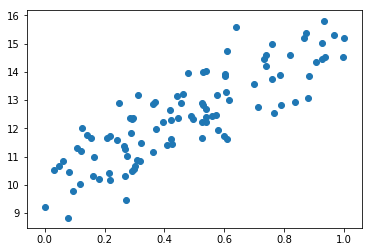

In [38]:
# TODO 构造线性函数

# TODO 构造 100 个线性函数上的点，加上适当的高斯噪音
import random
 
#TODO 对这100个点进行线性回归，将线性回归得到的函数和原线性函数比较
points = []
for i in range(100):
    a = random.random()
    b = 5 * a + 10
    b += random.gauss(0,1)
    child = [a,b]
    points.append(child)

#TODO 对这100个点进行线性回归，将线性回归得到的函数和原线性函数比较
result = linearRegression(points)
print "斜率比较："
print "原有斜率：5"
print "线性回归的斜率：" + str(result[0])
print "-----------"
print "截距比较："
print "原有截距：10"
print "线性回归的截距：" + str(result[1])

# 测试当前的点是否离散
import matplotlib.pyplot as plt
pts = transpose(points)
plt.scatter(pts[0], pts[1])
plt.show()